<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2025/blob/main/IMT_IC_HipoteseTests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Intervalos de Confiança e Testes de Hipótese**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, t

# Intervalo de Confiança (IC) para a média uma população e uma amostra (Distribuição Normal)

Quando temos dados de **uma população**, podemos calcular a média e o desvio padrão exatos. A fórmula para o IC da média da população pode ser então calculado como:

$$ IC = \mu \pm Z_{\alpha/2} \cdot \left(\frac{\sigma}{\sqrt{n}}\right) $$
onde:
- $\mu$ é a média da população.
- $Z_{\alpha/2}$ é o valor crítico da distribuição normal (para um nível de confiança $(1-\alpha)$.
- $\sigma$ é o desvio padrão da população.
- $n$ é o tamanho da população.

Para **uma amostra** fazemos uma aproximação pela distribuição de t-student.

$$ IC = \bar{x} \pm t_{\alpha/2, n-1} \cdot \left(\frac{s}{\sqrt{n}}\right) $$
onde:
- $\bar{x}$ é a média da população.
- $t_{\alpha/2, n-1}$ é o valor crítico da distribuição t de Student (para um nível de confiança $(1-\alpha)$ e $n-1$ graus de liberdade).  
- $s$ é o desvio padrão da amostra.
- $n$ é o tamanho da população.

Na prática, para $n \ge 30$ ambos são valores muito próximos.





In [ ]:
dados = np.array([2.3, 2.1, 3.5, 2.8, 3.3, 3.0, 2.7])
# dados = np.random.normal(size=1000) # Tente esse agora

n = len(dados)
media_amostra = np.mean(dados)
desvio_padrao_amostra = np.std(dados, ddof=1)
nivel_confianca = 0.95

# População
z_critico = stats.norm.ppf((1 + nivel_confianca) / 2)

margem_erro = z_critico * (desvio_padrao_amostra / np.sqrt(n))

IC_inferior = media_amostra - margem_erro
IC_superior = media_amostra + margem_erro
print(f"IC para a população: ({IC_inferior:.2f}, {IC_superior:.2f}), Intervalo = ({IC_superior - IC_inferior:.2f})")

# Amostra
t_critico = stats.t.ppf((1 + nivel_confianca) / 2, df=n-1)

margem_erro = t_critico * (desvio_padrao_amostra / np.sqrt(n))

IC_inferior = media_amostra - margem_erro
IC_superior = media_amostra + margem_erro
print(f"IC para a amostra  : ({IC_inferior:.2f}, {IC_superior:.2f}), Intervalo = ({IC_superior - IC_inferior:.2f})")


IC para a população: (2.44, 3.19), Intervalo = (0.75)
IC para a amostra  : (2.35, 3.28), Intervalo = (0.93)


## `norm.interval()`, `t.interval()`

In [ ]:
IC_inferior, IC_superior = norm.interval(nivel_confianca, loc=media_amostra, scale=desvio_padrao_amostra/np.sqrt(n))
print(f"IC para a população: ({IC_inferior:.2f}, {IC_superior:.2f}), Intervalo = ({IC_superior - IC_inferior:.2f})")

IC_inferior, IC_superior = t.interval(nivel_confianca, loc=media_amostra, scale=desvio_padrao_amostra/np.sqrt(n), df=n-1)
print(f"IC para a amostra  : ({IC_inferior:.2f}, {IC_superior:.2f}), Intervalo = ({IC_superior - IC_inferior:.2f})")

IC para a população: (2.44, 3.19), Intervalo = (0.75)
IC para a amostra  : (2.35, 3.28), Intervalo = (0.93)


Grau de liberdade: em geral, $n-1$, estimada a média de $n$ elementos, se calculamos a média de $n-1$ elementos, o valor do próximo elemento está definido!

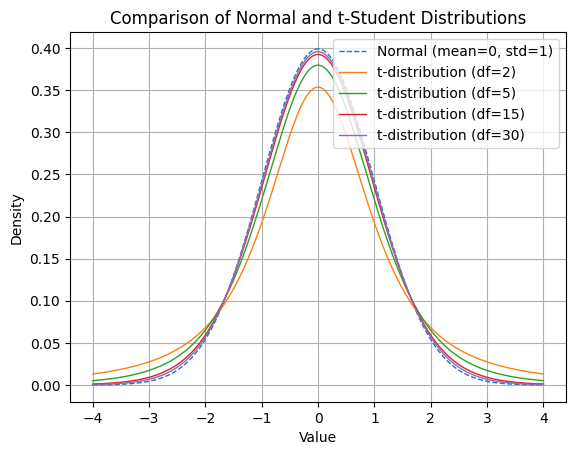

In [ ]:
x = np.linspace(-4, 4, 1000)

# Plot the normal distribution
plt.plot(x, norm.pdf(x, 0, 1), label='Normal (mean=0, std=1)',linewidth=1,linestyle='--')

# Plot the t-distributions for different degrees of freedom
dfs = [2, 5, 15, 30]
for df in dfs:
  plt.plot(x, t.pdf(x, df), label=f't-distribution (df={df})',linewidth=1)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Comparison of Normal and t-Student Distributions')
plt.legend()
plt.grid(True)
plt.show()

## Outras distribuições (desconhecida): Bootstraping e Resampling

Resampling são técnicas de reamostragem e podem envolver redução do tamanho da amostra e diferentes formas de seleção dos dados (pode exemplo o *cross-validation* ou *k-fold*). O Bootstraping é uma técnica específica de reamostragem onde a amostragem é feita com reposição. Ambas podem ser técnicas úteis para estimar médias e IC para distribuições desconhecidas.

IC Bootstrap: (-0.03, 0.09, Intervalo = (0.12)


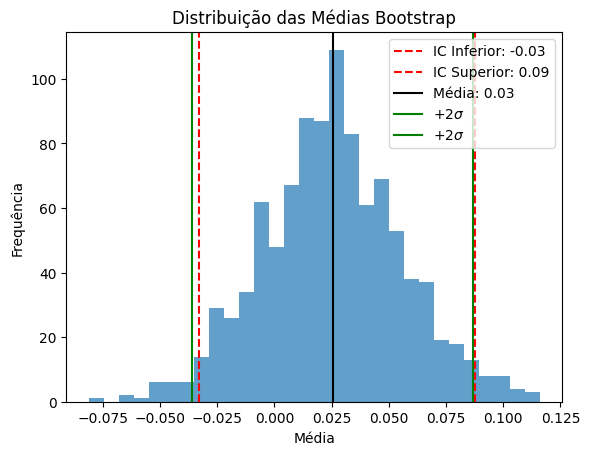

In [ ]:
dados = np.array([2.3, 2.1, 3.5, 2.8, 3.3, 3.0, 2.7])
dados = np.random.normal(size=1000) # Tente esse agora

# Parâmetros do Bootstrap
n_bootstraps = 1000
medias_bootstrap = []

np.random.seed(0)
for _ in range(n_bootstraps):
    amostra = np.random.choice(dados, size=len(dados), replace=True)      # Bootstrap, Cada dado pode ser selecionado várias vezes em cada amostra.
    # amostra = np.random.choice(dados, size=int(1/3*len(dados)), replace=False)   # Resample, Cada dado pode ser selecionado uma única vez em cada amostra. Não funciona aqui para a amostra pequena.
    medias_bootstrap.append(np.mean(amostra))

IC_inferior = np.percentile(medias_bootstrap, 2.5)
IC_superior = np.percentile(medias_bootstrap, 97.5)

print(f"IC Bootstrap: ({IC_inferior:.2f}, {IC_superior:.2f}, Intervalo = ({IC_superior - IC_inferior:.2f})")

plt.hist(medias_bootstrap, bins=30, alpha=0.7)
plt.axvline(IC_inferior, color='r', linestyle='--', label=f'IC Inferior: {IC_inferior:.2f}')
plt.axvline(IC_superior, color='r', linestyle='--', label=f'IC Superior: {IC_superior:.2f}')
plt.axvline(np.mean(medias_bootstrap), color='k', linestyle='-', label=f'Média: {np.mean(medias_bootstrap):.2f}')

plt.axvline(np.mean(medias_bootstrap)-2*np.std(medias_bootstrap), color='g', linestyle='-', label='$+2 \\sigma$')
plt.axvline(np.mean(medias_bootstrap)+2*np.std(medias_bootstrap), color='g', linestyle='-', label='$+2 \\sigma$')

plt.legend()
plt.title('Distribuição das Médias Bootstrap')
plt.xlabel('Média')
plt.ylabel('Frequência')
plt.show()


Isso será particularmente útil para dados com quaiquer distribuições e saída de modelos de ML que não seguem, necessariamente, uma distribuição conhecida.

# Testes Estatísticos: Testes de Hipótese ou de Significância

**Hipótese Estatística:** Uma hipótese estatística é geralmente uma afirmação sobre um conjunto de parâmetros de uma distribuição populacional.

<br>

* **$H_0$ (Hipótese Nula):** A hipótese nula é uma hipótese estatística a ser testada e aceita ou rejeitada em favor de uma alternativa.

Exemplos:
* A média dos valores é igual a $\bar{x}$.
* A média de dois conjuntos A e B de dados é igual.
* A média de A é maior que B.
* A é linearmente dependente de B.
* A é dependente de B.

etc.


* **$H_1$ (Hipótese Alternativa):** Uma hipótese alternativa é uma teoria oposta em relação à hipótese nula.

<br>

**Erro de tipo $\mathrm{I}$, FALSOS POSITIVOS**

Diz-se que o erro de tipo $\mathrm{I}$ ocorre se o teste solicitar incorretamente a rejeição de $H_0$ quando estiver realmente correto.

$\alpha = P(Rejeita \ H_0\ |\ H_0\ is\ true)$

<br>

**Erro de tipo $\mathrm{II}$, FALSOS NEGATIVOS**

O erro de tipo $\mathrm{II}$ ocorre se o teste solicitar a aceitação de $H_0$ quando for falso.

$\beta = P(Aceita \ H_0\ |\ H_0\ is \ not \ true)$

<br>

**Nível de significância**

Sempre que $H_0$ for verdadeiro, sua probabilidade de ser rejeitado nunca é maior que $\alpha$. O valor $\alpha$, chamado de nível de significância do teste, geralmente é definido antecipadamente, sendo os valores comumente escolhidos $\alpha = 0,1, 0,05, 0,005$.

<br>

**P_value**

O valor P, ou probabilidade calculada, é a probabilidade de encontrar os resultados observados, ou mais extremos, quando a hipótese nula (H 0) de uma questão de estudo é verdadeira - a definição de 'extremo' depende de como a hipótese está sendo testada.

Se o seu valor P for menor que o nível de significância escolhido, então você rejeita a hipótese nula, ou seja, aceita que sua amostra fornece evidências razoáveis para apoiar a hipótese alternativa.




# Diferentes Testes Estatísticos

| Teste Estatístico               | Situação                                          | Tipo dos Dados | Paramétrico/ Não Paramétrico | Distribuição dos Dados        |
|--------------------------------|---------------------------------------------------|----------------|-------------------------------|-------------------------------|
| Teste t (unpaired)             | Comparar média de duas amostras independentes     | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |
| Teste t (paired)               | Comparar média de duas amostras pareadas          | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |
| Teste z                         | Comparar proporção de uma amostra com um valor conhecido | Numérico    | Paramétrico                   | Aproximação normal (n > 30)  |
| ANOVA                          | Comparar média de três ou mais grupos independentes | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |
| ANOVA de Medidas Repetidas     | Comparar médias em várias ocasiões                | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |
| Teste de Wilcoxon (Mann-Whitney U) | Comparar medianas de duas amostras independentes | Numérico       | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Teste de Wilcoxon Signed-Rank  | Comparar medianas de duas amostras pareadas       | Numérico       | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Teste de Kruskal-Wallis        | Comparar medianas de três ou mais grupos independentes | Numérico       | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Qui-quadrado                    | Testar independência entre duas variáveis categóricas | Categórico     | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Teste de Dependência (ex: Correlação de Pearson) | Testar dependência entre duas variáveis numéricas | Numérico | Paramétrico                   | Normal ou aproximadamente normal |
| Teste de Friedman              | Comparar médias de três ou mais grupos pareados   | Numérico       | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Teste de Fisher (ANOVA Multivariada) | Comparar média de três ou mais grupos independentes (MANOVA) | Numérico | Paramétrico                   | Normal ou aproximadamente normal |
| Teste de Welch (t)              | Comparar média de duas amostras independentes     | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |


## Teste Bi-lateral (Bi-caudal)

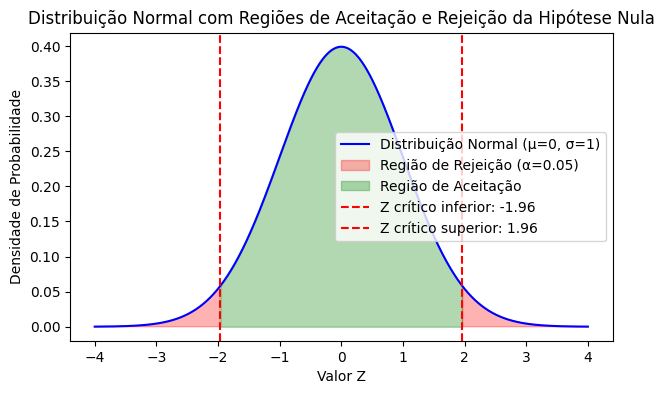

In [ ]:
media = 0
desvio_padrao = 1

# Valor crítico para alpha = 0.05 (95% de confiança)
alpha = 0.05
z_critico_inferior = stats.norm.ppf(alpha / 2)
z_critico_superior = stats.norm.ppf(1 - alpha / 2)

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, media, desvio_padrao)

plt.figure(figsize=(7,4))
plt.plot(x, y, label='Distribuição Normal (μ=0, σ=1)', color='blue')
plt.fill_between(x, y, where=(x <= z_critico_inferior) | (x >= z_critico_superior), color='red', alpha=0.3, label='Região de Rejeição (α=0.05)')
plt.fill_between(x, y, where=(x > z_critico_inferior) & (x < z_critico_superior), color='green', alpha=0.3, label='Região de Aceitação')
plt.axvline(z_critico_inferior, color='red', linestyle='--', label=f'Z crítico inferior: {z_critico_inferior:.2f}')
plt.axvline(z_critico_superior, color='red', linestyle='--', label=f'Z crítico superior: {z_critico_superior:.2f}')

plt.title('Distribuição Normal com Regiões de Aceitação e Rejeição da Hipótese Nula')
plt.xlabel('Valor Z')
plt.ylabel('Densidade de Probabilidade')
plt.legend(fontsize=10)
plt.show()


## Teste-Unilateral (Uni-caudal)

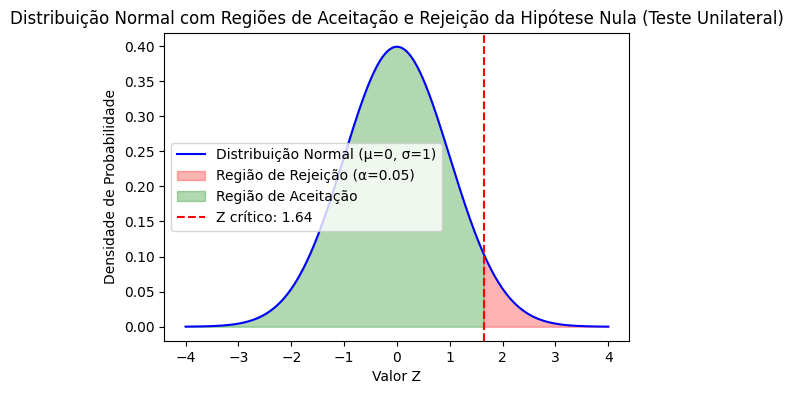

In [ ]:
media = 0
desvio_padrao = 1

# Valor crítico para alpha = 0.05 (unilateral à direita)
alpha = 0.05
z_critico = stats.norm.ppf(1 - alpha)

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, media, desvio_padrao)

plt.figure(figsize=(6,4))
plt.plot(x, y, label='Distribuição Normal (μ=0, σ=1)', color='blue')
plt.fill_between(x, y, where=(x >= z_critico), color='red', alpha=0.3, label='Região de Rejeição (α=0.05)')
plt.fill_between(x, y, where=(x < z_critico), color='green', alpha=0.3, label='Região de Aceitação')
plt.axvline(z_critico, color='red', linestyle='--', label=f'Z crítico: {z_critico:.2f}')

plt.title('Distribuição Normal com Regiões de Aceitação e Rejeição da Hipótese Nula (Teste Unilateral)')
plt.xlabel('Valor Z')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()


# **Grau de Liberdade (`dof`, degrees of freedom)**

**Grau de liberdade** é o número de valores **livres para variar** em um cálculo estatístico, **dado que certas restrições já foram impostas**.

Imagine que você tem **três números** cuja **média é conhecida**. Digamos:

* Sabemos que a média é 10, e temos **3 valores** $x_1, x_2, x_3$. Portanto, $
  \frac{x_1 + x_2 + x_3}{3} = 10 \Rightarrow x_1 + x_2 + x_3 = 30
  $.

* Se você **escolher livremente** dois dos valores (por exemplo, $x_1 = 12$ e $x_2 = 8$),
o **terceiro valor $x_3$** **já está determinado**: $
x_3 = 30 - (x_1 + x_2) = 30 - 20 = 10
$.

<br>

**Você só tem liberdade para escolher 2 dos 3 valores.** O terceiro é **restrito** pela média. **Portanto, os graus de liberdade = número de observações (3) − número de restrições (1, a média).** Neste caso $3 - 1 = 2$




## Aplicação do `dof` na variância amostral

Ao calcular a **variância de uma amostra** (ou o desvio padrão!), usamos a **média da própria amostra** (não da população). Isso **impõe uma restrição** nos dados: a soma dos desvios em relação à média **sempre será zero**.

Como consequência, apenas $n - 1$ valores têm **liberdade real para variar**. Por isso, o denominador na variância amostral é $n - 1$, e dizemos que há **$n - 1$ graus de liberdade**.

Se usarmos $n$ no denominador (como na variância populacional), o estimador da variância seria **tendencioso (biased)** — ele subestima a variância verdadeira da população. Usar $n - 1$ **corrige esse viés**, fornecendo uma **estimativa não tendenciosa** da variância da população a partir de uma amostra.





$$ \sigma^2 = \sum \frac{(x - \mu)^2}{n}$$

$$ s^2 = \sum \frac{(x - \bar{x})^2}{n-1}$$

### Exemplo

Mesmo para um número pequeno de amostras, com dof1 o resultado é bastante mais próximo do esperado.

Variância real da população: 100.18
Média das variâncias com ddof=0 (tendenciosa): 96.42
Média das variâncias com ddof=1 (não tendenciosa): 99.75


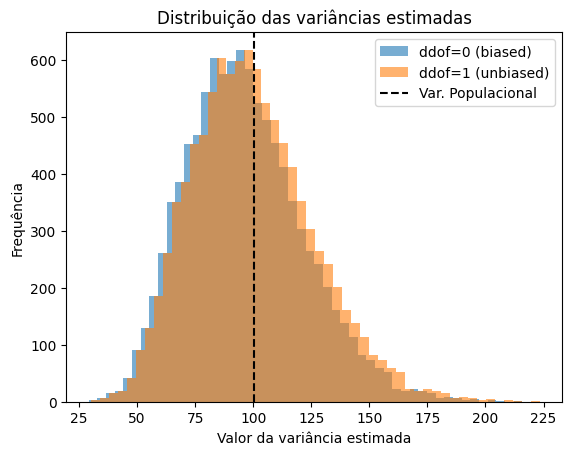

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
populacao = np.random.normal(loc=50, scale=10, size=100000)

# Variância real da população
variancia_populacional = np.var(populacao)
print(f"Variância real da população: {variancia_populacional:.2f}")

# Parâmetros da simulação
n_amostras = 10000 # aumente para ter um resultado mais próximo com ddof1
tamanho_amostra = 30

variancias_com_ddof0 = []
variancias_com_ddof1 = []

for _ in range(n_amostras):
    amostra = np.random.choice(populacao, size=tamanho_amostra, replace=False)
    var_ddof0 = np.var(amostra, ddof=0)
    var_ddof1 = np.var(amostra, ddof=1)
    variancias_com_ddof0.append(var_ddof0)
    variancias_com_ddof1.append(var_ddof1)

media_var_ddof0 = np.mean(variancias_com_ddof0)
media_var_ddof1 = np.mean(variancias_com_ddof1)

print(f"Média das variâncias com ddof=0 (tendenciosa): {media_var_ddof0:.2f}")
print(f"Média das variâncias com ddof=1 (não tendenciosa): {media_var_ddof1:.2f}")

plt.hist(variancias_com_ddof0, bins=50, alpha=0.6, label='ddof=0 (biased)')
plt.hist(variancias_com_ddof1, bins=50, alpha=0.6, label='ddof=1 (unbiased)')
plt.axvline(variancia_populacional, color='black', linestyle='dashed', label='Var. Populacional')
plt.title("Distribuição das variâncias estimadas")
plt.xlabel("Valor da variância estimada")
plt.ylabel("Frequência")
plt.legend()
plt.show()


## Exemplo de Teste de Hipótese, Definição $\times$ Funções...

$$ Z_{\alpha/2, n} = \frac{\mu - \mu_0}{\left(\frac{\sigma}{\sqrt{n}}\right)}$$

$$Z_{\alpha/2, n} = \pm 1.96 , \space \space P(∣Z∣>1.96)=0.05$$

$$p-\text{value} =2⋅P(Z>∣z_c|)$$



In [ ]:
import numpy as np
from scipy import stats
from scipy.stats import norm, t, ttest_1samp

normal_sample = np.random.normal(loc=0, scale=1, size=100)

# Cálculo direto
mean_sample = np.mean(normal_sample)
std_sample = np.std(normal_sample, ddof=1)
n_sample = len(normal_sample)
mu_0 = 0  # Média sob a hipótese nula (H0)

# Cálculo da estatística t
t_stat_manual = (mean_sample - mu_0) / (std_sample / np.sqrt(n_sample))

# Graus de liberdade
df = n_sample - 1

# Cálculo do p-valor (teste bilateral)
p_value_manual = 2 * (1 - stats.t.cdf(abs(t_stat_manual), df))

print("Teste de Hipóteses (Cálculo Direto):")
print(f"Estatística t calculada: {t_stat_manual:.4f}")
print(f"P-valor calculado: {p_value_manual:.4f}")

# Interpretação (exemplo com alpha = 0.05)
alpha = 0.05
if p_value_manual < alpha:
    print(f"Com p-valor ({p_value_manual:.4f}) < alpha ({alpha}), rejeitamos a hipótese nula (H0).")
    print("A média da amostra é estatisticamente diferente de 0.")
else:
    print(f"Com p-valor ({p_value_manual:.4f}) >= alpha ({alpha}), não rejeitamos a hipótese nula (H0).")
    print("Não há evidência suficiente para dizer que a média da amostra é estatisticamente diferente de 0.")

print("\n" + "="*30 + "\n")

# Teste de hipóteses 2: Usando ttest_1samp
t_stat_scipy, p_value_scipy = ttest_1samp(normal_sample, mu_0)

print("Teste de Hipóteses (Usando ttest_1samp):")
print(f"Estatística t da função: {t_stat_scipy:.4f}")
print(f"P-valor da função: {p_value_scipy:.4f}")

# Interpretação (exemplo com alpha = 0.05)
if p_value_scipy < alpha:
    print(f"Com p-valor ({p_value_scipy:.4f}) < alpha ({alpha}), rejeitamos a hipótese nula (H0).")
    print("A média da amostra é estatisticamente diferente de 0.")
else:
    print(f"Com p-valor ({p_value_scipy:.4f}) >= alpha ({alpha}), não rejeitamos a hipótese nula (H0).")
    print("Não há evidência suficiente para dizer que a média da amostra é estatisticamente diferente de 0.")

Teste de Hipóteses (Cálculo Direto):
Estatística t calculada: -0.6513
P-valor calculado: 0.5164
Com p-valor (0.5164) >= alpha (0.05), não rejeitamos a hipótese nula (H0).
Não há evidência suficiente para dizer que a média da amostra é estatisticamente diferente de 0.


Teste de Hipóteses (Usando ttest_1samp):
Estatística t da função: -0.6513
P-valor da função: 0.5164
Com p-valor (0.5164) >= alpha (0.05), não rejeitamos a hipótese nula (H0).
Não há evidência suficiente para dizer que a média da amostra é estatisticamente diferente de 0.


# Exemplo de Teste de Hipótese

Vamos considerar que você tem dados de homens e mulheres e deseja testar hipóteses sobre a média de idade de homens e mulheres.




In [ ]:
media_homens = 35
media_mulheres = 35
desvio_padrao_homens = 5
desvio_padrao_mulheres = 5
tamanho_amostra = 50

amostra_homens = np.random.normal(media_homens, desvio_padrao_homens, tamanho_amostra+10)
amostra_mulheres = np.random.normal(media_mulheres, desvio_padrao_mulheres, tamanho_amostra)


In [ ]:
np.mean(amostra_homens), np.mean(amostra_mulheres)

(np.float64(36.35522636270229), np.float64(34.30835980723295))

In [ ]:
t_stat, p_valor = stats.ttest_ind(amostra_homens, amostra_mulheres)

print("Estatística t:", t_stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Rejeita a hipótese nula - as médias são estatisticamente diferentes.")
else:
    print("Não rejeita a hipótese nula - não há evidências para afirmar diferença das médias.")

Estatística t: 2.5239184824194028
Valor p: 0.013060304757985601

Rejeita a hipótese nula - as médias são estatisticamente diferentes.


In [ ]:
from statsmodels.stats.weightstats import ztest
z_stat, p_valor = ztest(amostra_homens, amostra_mulheres, value=0)
# z_stat, p_valor = ztest(amostra_homens, amostra_mulheres, value=0)

print("Estatística z:", z_stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Rejeita a hipótese nula - as médias são estatisticamente diferentes.")
else:
    print("Não rejeita a hipótese nula - não há evidências para afirmar diferença das médias.")

Estatística z: 2.5239184824194028
Valor p: 0.011605483672594435

Rejeita a hipótese nula - as médias são estatisticamente diferentes.


In [ ]:
t_stat, p_valor = stats.ttest_ind(amostra_homens, amostra_mulheres, alternative='greater')

print("Estatística t:", t_stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Rejeita a hipótese nula - a média das idades dos homens é estatisticamente maior.")
else:
    print("Não rejeita a hipótese nula - não há evidências para afirmar que a média de idade dos homens é maior.")


Estatística t: 2.5239184824194028
Valor p: 0.006530152378992801

Rejeita a hipótese nula - a média das idades dos homens é estatisticamente maior.


# Regra de "Ouro" para testar os seus testes

**Force a Hipótese Nula!!!**

## Testes de Hipóteses: Paramétricos $\times$ Não Paramétricos

Testes Paramétricos assumem uma distribuição normal dos dados (ou alguma outra distribuição específica) requerendo outros pressupostos, como variância constante, mas têm poder estatístico maior quando os pressupostos são atendidos. Já os Testes Não Paramétricos, não assumem distribuição específica dos dados, são mais flexíveis e robustos, mas geralmente têm menor poder estatístico.

* **Testes Paramétricos** $\longrightarrow$ Distribuição normal, variância constante, grandes amostras, valores contínuos.
* **Testes Não Paramétricos** $\longrightarrow$ Distribuição desconhecida ou não normal, pequenas amostras, valores ordinais ou categóricos ,grande presença de *outliers*

**Cuidado: usar teste paramétricos violando os pressupostos pode levar a resultados e conclusões erradas! O cálculo sempre pode ser feito, mas a interpretação e adequação do teste está com você!**

<br>
<br>

# Teste de hipóteses para comparar duas médias $μ_1$ e $μ_2$ de duas populações

Sejam $X_1$ e $X_2$ as duas variáveis aleatórias de interesse com médias $\mu_1$ e $\mu_2$, respectivamente, e variâncias $\sigma_1$ e $\sigma_2$ respectivamente.
\
As hipóteses de interesse são:

> $H_0:μ_A=μ_B$

> $H_a:μ_A \ne μ_B$ ou $H_a:μ_A < μ_B$ ou $H_a:μ_A > μ_B$


É necessário que as amostras aleatórias das duas populações sejam independentes.

*   **Para tamanhos de amostras grandes**
1.  Variâncias ($\sigma_1$ e $\sigma_2$) conhecidas é iguais (difícil de encontrar na prática)
\
Usaremos a distribuição Normal padrão para calcular o valor-p (valor aproximado). O valor-p será exato se as duas v.a. tiveram distribuições normais.
2. Variâncias ($\sigma_1$ e $\sigma_2$) desconhecidas, porém iguais
\
Usaremos a distribuição t-student com $n_1+n_2-2$ graus de liberdade se as duas v.a. tiveram distribuições normais. Caso contrário, podemos usar a aproximação da distribuição normal uma vez que os tamanhos das amostras serão grandes.
3. Variâncias ($\sigma_1$ e $\sigma_2$) desconhecidas diferentes
\
Usaremos a distribuição t-student com $p$ graus de liberdade (calculados em função das variâncias amostrais) se as duas v.a. tiveram distribuições normais. Caso contrário, podemos usar a aproximação da distribuição normal uma vez que os tamanhos das amostras são grandes.


# Exemplos 1, `ttest`, `ztest`
Agora estamos interessados em verificar se os salários médios dos homens e  as mulheres na companhia Glassdoor são diferentes.
\
Vamos verificar estatísticamente usando os dados da base Glassdoor


In [ ]:
data = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Projects/glassdoordata.csv')
data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [ ]:
# Estatística descritiva

incomeFemale = data[data.gender == 'Female'].income
incomeMale = data[data.gender == 'Male'].income

print('Média de Salários:')
print('Homens: {:.2f}'.format(incomeMale.mean()))
print('Mulheres: {:.2f}'.format(incomeFemale.mean()))
print('Diferença da média salarial é de {:.2f} ou {:.2f}%'.format(
        incomeMale.mean() - incomeFemale.mean(), 100*(incomeMale.mean() - incomeFemale.mean())/ incomeMale.mean()))
print("")
print('Desvio padrão de Salários:')
print('Homens: {:.2f}'.format(incomeMale.std()))
print('Mulheres: {:.2f}'.format(incomeFemale.std()))


Média de Salários:
Homens: 98457.55
Mulheres: 89942.82
Diferença da média salarial é de 8514.73 ou 8.65%

Desvio padrão de Salários:
Homens: 25517.52
Mulheres: 24378.28


Note que, aparentemente, os salários médio dos homens é maior quando comparado com o salário médio das mulheres. No entanto, observa-se um alta variabilidade nos salários destes dois grupo.  

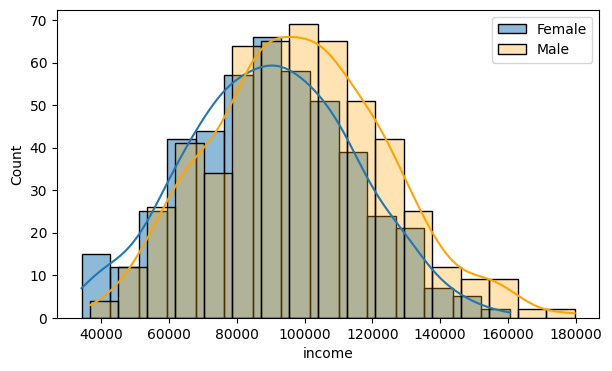

In [ ]:
# Histogramas

fig = plt.figure(figsize=(7,4))
sns.histplot(incomeFemale,label='Female',kde=True)
sns.histplot(incomeMale,color='orange',alpha=0.3,label='Male',kde=True)

plt.legend()
plt.show()

Nota-se que as distribuições dos salários das mulheres e homens seguem, aproximadamente, uma distribuição normal. Observa-se também que as variabilidades são "parecidas". Assim, podemos usar a distribuição t-student, assumindo igualdade de variâncias, para testar nossa hipótese

In [ ]:
from scipy import stats

ttest_Score, value_p = stats.ttest_ind(incomeFemale, incomeMale, equal_var=True)

print('p-value: {:.10f}'.format(value_p))

if value_p < 0.05:
	print('Rejeita-se a Hipótese Nula ao n.s. de 5%')
else:
	print('Não se rejeita a Hipótese Nula ao n.s. de 5%')

p-value: 0.0000000948
Rejeita-se a Hipótese Nula ao n.s. de 5%


Conclusão: Concluímos, portanto, que há diferença significativa entre a remuneração média dos homens e mulheres na empresa.

**Obs** É possível usar o teste de Bartletts's para verificar se duas populações apresentam a mesma variabilidade (igualdade de variâncias)

## Bartlett's test

As hipóteses de interesse são:

> $H_0:\sigma^2_A=\sigma^2_B$

> $H_a:\sigma^2_A \ne \sigma^2_B$

In [ ]:
# Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances.

from scipy.stats import bartlett
Bstat, p_value = bartlett(incomeFemale, incomeMale)

print('p-value: {:.10f}'.format(p_value))
if p_value < 0.05:
	print('Rejeita-se a Hipótese Nula ao n.s. de 5%')
else:
	print('Não se rejeita a Hipótese Nula ao n.s. de 5%')

p-value: 0.1543043145
Não se rejeita a Hipótese Nula ao n.s. de 5%


No código abaixo apresenta-se o resultado do teste de hipótese usando-se a aproximação pela normal uma vez que os tamanhos das amostras são "grandes".


In [ ]:
# Usando a aproximação pela normal

from statsmodels.stats.weightstats import ztest
zstat, value_p =ztest(x1=incomeFemale, x2=incomeMale, alternative="two-sided")
print('p-value: {:.10f}'.format(value_p))

p-value: 0.0000000761


## Normaltest

Teste para verificar normalidade.

In [ ]:
# Os salários das mulheres segue uma dist. normal?
from scipy.stats import normaltest
stats, p_value = normaltest(incomeFemale)

print('p-value: {:.10f}'.format(value_p))
if p_value < 0.05:
	print('Rejeita-se a Hipótese Nula ao n.s. de 5%')
else:
	print('Não se rejeita a Hipótese Nula ao n.s. de 5%')

p-value: 0.0000000761
Não se rejeita a Hipótese Nula ao n.s. de 5%


Note que podemos assumir que os salários das mulheres segue aproximadamente uma dist normal

# Condições para Aplicação de Testes Paramétricos


## Normalidade  

> Os dados devem seguir uma distribuição normal ou aproximadamente normal. Especialmente importante para testes que comparam médias (como o teste t de Student).

## Homogeneidade das Variâncias

> As variâncias das populações das quais as amostras foram retiradas devem ser aproximadamente iguais (homocedasticidade).

## Independência dos Dados

> As observações devem ser independentes umas das outras, isto é, a resposta de uma observação não deve influenciar a resposta de outra (veja também os testes de amostras pareadas).

## Nível de Medição

> Os dados devem ser em escala intervalar ou razão, o que significa que os ##dados devem ser contínuos##.

>> *Por exemplo, "scores" não são boas variáveis para aplicação de testes como esses*

## Tamanho da Amostra

> Idealmente $n>30$. Para o teste t, se a amostra é pequena, a suposição de normalidade se torna ainda mais crucial.

# Wilcoxon (não paramétrico) para Comparação de Médias

Em fisioterapia mede-se a dor em uma escala de 1 a 10 (não contínua!) portanto não podemos aplicar um t-test.

In [ ]:
from scipy.stats import wilcoxon

# Dados de medida de dor para dois tratamentos diferentes
tratamento_a = np.array([3, 4, 2, 5, 6, 4, 7, 6, 5, 4])
tratamento_b = np.array([2, 3, 1, 4, 5, 3, 6, 5, 4, 3])

stat, p_value = wilcoxon(tratamento_a, tratamento_b)

print("Estatística:", stat)
print("P-value:", p_value)
print()

if p_valor < 0.05:
    print("Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.")
else:
    print("Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar diferença nas médias.")


Estatística: 0.0
P-value: 0.001953125

Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.


# Exemplos 2

Etapas de um teste de hipótese (paramétrico):

1. Especifique a hipótese nula e alternativa e o teste.
2. Colete uma amostra aleatória da população.
3. Verifique se as condições do teste são atendidas.
4. Calcule a estatística de teste e o valor P correspondente.
5. Decida se deseja rejeitar ou não rejeitar sua hipótese. nula

In [ ]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import nbinom
from scipy.stats import geom
from scipy.stats import poisson
from scipy.stats import uniform
from scipy.stats import randint
from scipy.stats import expon
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import weibull_min
from scipy.stats import hypergeom
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.stats.weightstats import ztest


## `stats.ttest_1samp(x, mu)`

Testa uma média hipotética ou teórica.

## Exemplo

3 empresas fazem um anúncio afirmando remunerar cientistas de dados 10% acima do mercado, cuja média é R$ 8735 a.m. Você obtêm amostra de salários de 30 cientistas de dados das empresas. Você consegue afirmar que o anúncio de quais empresas é justo?

$$H_0: \mu = 9608 $$
$$H_1: \mu \ne 9608 $$


In [ ]:
8735*1.1

9608.5

In [ ]:
#@markdown
values1 = norm.rvs(loc=9580,size=30,scale=50,random_state=123)
values2 = norm.rvs(loc=9580,size=30,scale=100,random_state=123)
values3 = norm.rvs(loc=9580,size=30,scale=200,random_state=123)


In [ ]:
values1.mean()

9582.235698548093

In [ ]:
values2.mean()

9584.471397096186

In [ ]:
values3.mean()

9588.942794192373

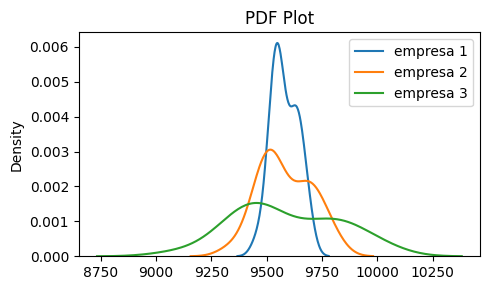

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(values1,ax=ax,label='empresa 1')
sns.kdeplot(values2,ax=ax,label='empresa 2')
sns.kdeplot(values3,ax=ax,label='empresa 3')
ax.set_title('PDF Plot')

plt.legend()
plt.tight_layout()
plt.show()

## Trick: Validando o teste

In [ ]:
stat, p = stats.ttest_1samp(values3, values3.mean())

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 1.0


In [ ]:
stat, p = stats.ttest_1samp(values3, values3.mean() - 4*values3.std())

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Rejeita H0 2.1766142008525573e-19


## Testando

In [ ]:
stat, p = stats.ttest_1samp(values1, 9608)

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Rejeita H0 0.024252947874818437


In [ ]:
stat, p = stats.ttest_1samp(values2, 9608)

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 0.28663859783620127


In [ ]:
stat, p = stats.ttest_1samp(values3, 9608)

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 0.6634796139956985


Somente a empresa 1 não parece poder afirmar ter uma média de salário 10% acima do mercado.

## `stats.ttest_ind(x1, x2)`

Testa a média de duas populações.

## Exemplo

Uma quarta empresa apresentou um salário médio para os cientistas de dados de R$ 9777 a.m. O salário médio dessa empresa é significativamente diferente do salário médio dos demais que justifique você buscar uma colocação nessa empresa e não nas demais?

$$H_0:  \mu_0 = \mu_1 $$
$$H_1: \mu_0 \ne \mu_1 $$


In [ ]:
#@markdown
values4 = norm.rvs(loc=9720,size=20,scale=500,random_state=123)


In [ ]:
values4.mean()

9777.208865977645

## Trick: Validando o teste

In [ ]:
stat, p = stats.ttest_ind(values4, values4)

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 1.0


## Testando

In [ ]:
stat, p = stats.ttest_ind(values1, values4)

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 0.09637289780091156


In [ ]:
stat, p = stats.ttest_ind(values2, values4)

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 0.10676604710200716


In [ ]:
stat, p = stats.ttest_ind(values3, values4)

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 0.14169685317827294


Nenhuma das empresas têm uma diferença significativa do salário médio com a empresa 4.

## `stats.ttest_rel(x1, x2)`  
Testes pareados, o mesmo que,

`stats.ttest_1samp(x1 - x2, 0)`  


# Testes de Correlação

Ou **Pearson's Correlation Test** é um teste de Hipótese em que queremos verificar se duas amostras são **linearmente dependentes**. As hipóteses são:

$H_0: $ não são linearmente dependentes

$H_a: $ são linearmente dependentes

Esse teste é fundamental para aplicarmos ou avaliarmos modelos lineares como você verá seguir.

**Nota**: A correlação verifica apenas a dependência linear. Não obstante sua importância, rejeitar a hipótese de linearmente dependentes não elimina muitas outras formas de dependência (se quiser, pense em $y = x^2$, $y = cos(x)$ ou no quarteto de Anscomble).    

In [ ]:
# H_0: não são linearmente dependentes
# H_a: são linearmente dependentes
#
# Pearson correlation test

# pearson_corr, p_value = stats.pearsonr(np.random.sample(len(data)), data.income)

pearson_corr, p_value = stats.pearsonr(data.age, data.income)
print('Pearson correlation coefficient: {:.3f}'.format(pearson_corr))
print('p-value: {:.10f}'.format(p_value))

if p_value < 0.05:
	print('Rejeita-se a H0 ao n.s. de 5%') # não há dependência linear
else:
	print('Não se rejeita a H0 ao n.s. de 5%') # dependência linear

Pearson correlation coefficient: 0.563
p-value: 0.0000000000
Rejeita-se a H0 ao n.s. de 5%


In [ ]:
# H_0: não são monotonicamente dependentes
# H_a: são monotonicamente dependentes
#
# Spearman’s rank correlation coefficient

spearman_corr, p_value = stats.spearmanr(data.age, data.income)
print('Spearman correlation coefficient: {:.3f}'.format(spearman_corr))
print('p-value: {:.10f}'.format(p_value))

if p_value < 0.05:
	print('Rejeita-se a H0 ao n.s. de 5%') # não há dependência linear
else:
	print('Não se rejeita a H0 ao n.s. de 5%') # dependência linear

Spearman correlation coefficient: 0.563
p-value: 0.0000000000
Rejeita-se a H0 ao n.s. de 5%


# Teste de Qui-Quadrado $\chi^2$ a Dependência de Duas Variáveis Categóricas

Testes Qui-Quadrado $\chi^2$ empregam tabelas de contingência. O que são?

In [ ]:
data.education.value_counts()

education
High School    265
Masters        256
College        241
PhD            238
Name: count, dtype: int64

In [ ]:
# H_0: as duas variáveis são independentes
# H_a: as duas variáveis são dependentes

ct = pd.crosstab(data.gender, data.education)
print(ct)
# Agora vamos realizar o teste de qui-quadrado usando o `scipy`

chi2, p, dof, expected = stats.chi2_contingency(ct)
print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
# print('Expected frequencies:')
# print(expected)

print()
if p_value < 0.05:
	print('Rejeita-se a H0 ao n.s. de 5%') # não há dependência linear
else:
	print('Não se rejeita a H0 ao n.s. de 5%') # dependência linear

education  College  High School  Masters  PhD
gender                                       
Female         123          132      107  106
Male           118          133      149  132
Chi-square statistic: 5.766087051757465
p-value: 0.12356206838006176
Degrees of freedom: 3

Rejeita-se a H0 ao n.s. de 5%
